___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [145]:
import tensorflow as tf
tf. __version__


'2.10.0'

In [146]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses


In [147]:
df.tail(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23484,23484,1084,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!",3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,"This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!",5,1,22,General Petite,Dresses,Dresses


In [148]:
df.shape

(23486, 11)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


There are missing datas in some columns especially in Title column.

In [150]:
df.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [151]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

### Data Wrangling

In [152]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [153]:
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored

In [154]:
def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"), '\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"), '\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')


In [155]:
def drop_columns(df, drop_columns):
    if drop_columns != []:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']), '\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')


In [156]:
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100) > limit:
            print(df.isnull().sum()[i], 'percent of',
                  i, 'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
    print('New shape after missing value control:', df.shape)


In [157]:
print(colored("Shape:", attrs=['bold']), df.shape, '\n',
      colored('-'*80, 'red', attrs=['bold']),
      colored("\nInfo:\n", attrs=['bold']), sep='')
print(df.info(), '\n',
      colored('-'*80, 'red', attrs=['bold']), sep='')


Shape:(23486, 11)
--------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
-----------------------------------------

In [158]:
print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(), '\n',
      colored('-'*80, 'red', attrs=['bold']), sep='')


Number of Uniques:
Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64
--------------------------------------------------------------------------------


In [159]:
print(colored("Missing Values:\n", attrs=['bold']), missing_values(df), '\n',
      colored('-'*80, 'red', attrs=['bold']), sep='')


Missing Values:
                 Missing_Number  Missing_Percent
Title                      3810         0.162224
Review Text                 845         0.035979
Division Name                14         0.000596
Department Name              14         0.000596
Class Name                   14         0.000596
--------------------------------------------------------------------------------


In [160]:
print(colored("All Columns:", attrs=['bold']), list(df.columns), '\n',
      colored('-'*80, 'red', attrs=['bold']), sep='')


All Columns:['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']
--------------------------------------------------------------------------------


df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

print(colored("Columns after rename:", attrs=['bold']), list(df.columns), '\n',
      colored('-'*80, 'red', attrs=['bold']), sep='')


In [161]:
duplicate_values(df)
drop_columns(df, [])
drop_null(df, 90)

Duplicate check...
There are no duplicates
-------------------------------------------------------------------------------
We will now check the missing values and if necessary will drop related columns!
-------------------------------------------------------------------------------
Shape: (23486, 11)
New shape after missing value control: (23486, 11)


In [162]:
df.drop(['Unnamed: 0', 'Clothing ID'], axis=1, inplace=True)
df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0


In [164]:
df.describe(include=object).T

,count,unique,top,freq
Title,19676,13993,Love it!,136
Review Text,22641,22634,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,3
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


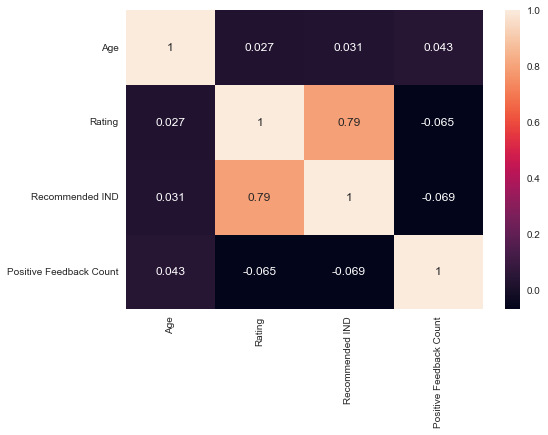

In [165]:
sns.heatmap(df.corr(), annot=True);

In [166]:
def summary(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(
        df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna=False))


In [167]:
summary('Age')

column name    :  Age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
39    1269
35     909
36     842
34     804
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64


In [168]:
df.Age.describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

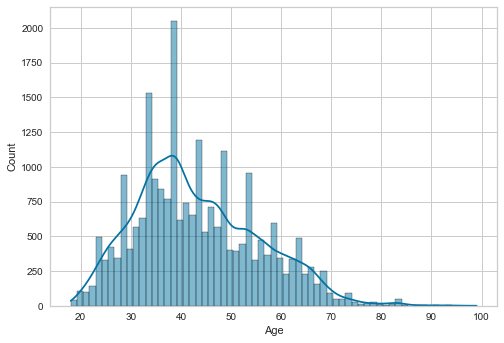

In [169]:
sns.histplot(data=df, x='Age', kde=True);

In [170]:
summary('Rating')

column name    :  Rating
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64


In [171]:
df.Rating.describe()

count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

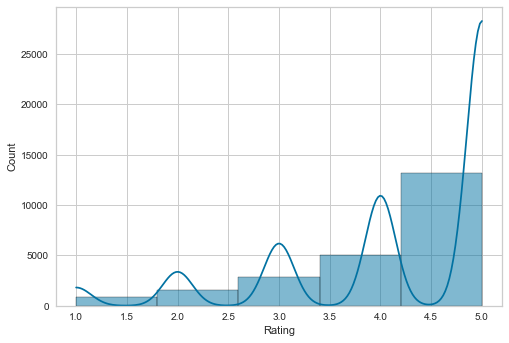

In [172]:
sns.histplot(data=df, x='Rating', bins=5, kde=True);

In [173]:
summary('Recommended IND')

column name    :  Recommended IND
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    19314
0     4172
Name: Recommended IND, dtype: int64


In [174]:
df['Recommended IND'].describe()

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended IND, dtype: float64

<AxesSubplot:xlabel='Recommended IND', ylabel='Count'>

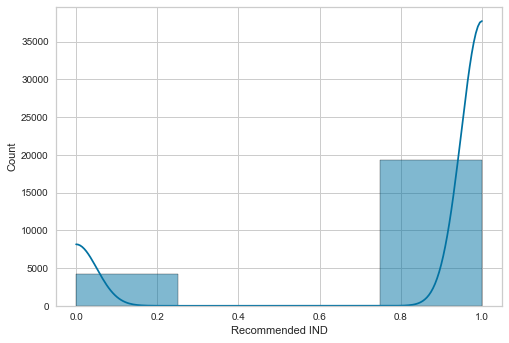

In [175]:
sns.histplot(data=df, x='Recommended IND', bins=4, kde=True)


In [176]:
summary('Positive Feedback Count')


column name    :  Positive Feedback Count
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  82
0      11176
1       4043
2       2193
3       1433
4        922
       ...  
94         1
117        1
71         1
84         1
59         1
Name: Positive Feedback Count, Length: 82, dtype: int64


In [177]:
df['Positive Feedback Count'].describe()


count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

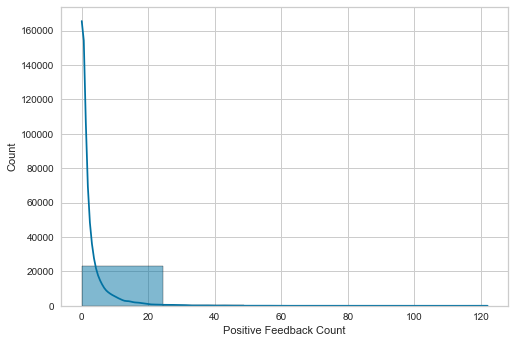

In [178]:
sns.histplot(data=df, x='Positive Feedback Count', bins=5, kde=True);

In [179]:
summary('Division Name')

column name    :  Division Name
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  3
General           13850
General Petite     8120
Initmates          1502
NaN                  14
Name: Division Name, dtype: int64


In [180]:
df['Division Name'].describe()

count       23472
unique          3
top       General
freq        13850
Name: Division Name, dtype: object

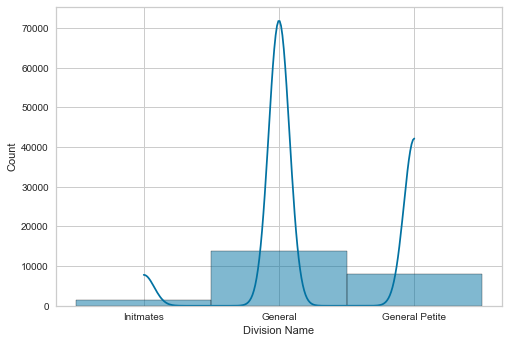

In [181]:
sns.histplot(data=df, x='Division Name', bins=5, kde=True);

In [182]:
summary('Department Name')

column name    :  Department Name
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  6
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
NaN            14
Name: Department Name, dtype: int64


In [183]:
df['Department Name'].describe()

count     23472
unique        6
top        Tops
freq      10468
Name: Department Name, dtype: object

<AxesSubplot:xlabel='Department Name', ylabel='Count'>

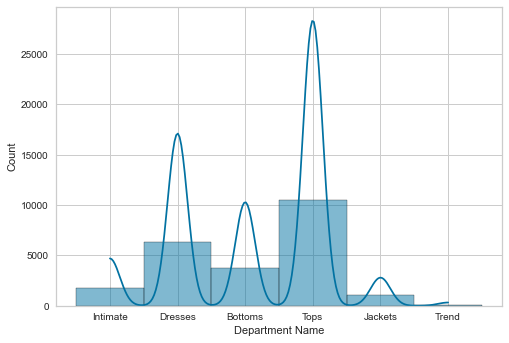

In [184]:
sns.histplot(data=df, x='Department Name', bins=5, kde=True)


In [185]:
summary('Class Name')

column name    :  Class Name
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  20
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
NaN                 14
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64


In [186]:
df['Class Name'].describe()

count       23472
unique         20
top       Dresses
freq         6319
Name: Class Name, dtype: object

<AxesSubplot:xlabel='Class Name', ylabel='Count'>

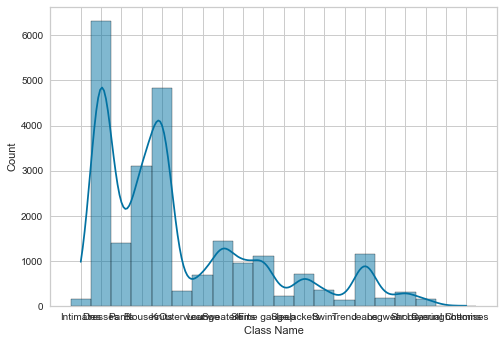

In [187]:
sns.histplot(data=df, x='Class Name', bins=15, kde=True)


In [188]:
summary('Title')

column name    :  Title
--------------------------------
per_of_nulls   :  % 16.22
num_of_nulls   :  3810
num_of_uniques :  13993
NaN                                        3810
Love it!                                    136
Beautiful                                    95
Love                                         88
Love!                                        84
                                           ... 
Not for my body                               1
Perfect transition dress                      1
The perfect spring dress!                     1
Super soft but can make you look frumpy       1
Please make more like this one!               1
Name: Title, Length: 13994, dtype: int64


In [189]:
df.Title.describe()

count        19676
unique       13993
top       Love it!
freq           136
Name: Title, dtype: object

In [190]:
summary('Review Text')

column name    :  Review Text
--------------------------------
per_of_nulls   :  % 3.6
num_of_nulls   :  845
num_of_uniques :  22634
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       845
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                   

In [191]:
df['Review Text'].describe()

count                                                 22641
unique                                                22634
top       Perfect fit and i've gotten so many compliment...
freq                                                      3
Name: Review Text, dtype: object

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [192]:
df['Recommended IND'].value_counts()


1    19314
0     4172
Name: Recommended IND, dtype: int64

In [193]:
df['Recommended IND'] = df['Recommended IND'].map({1:0, 0:1})

In [194]:
df['Recommended IND'].value_counts()


0    19314
1     4172
Name: Recommended IND, dtype: int64

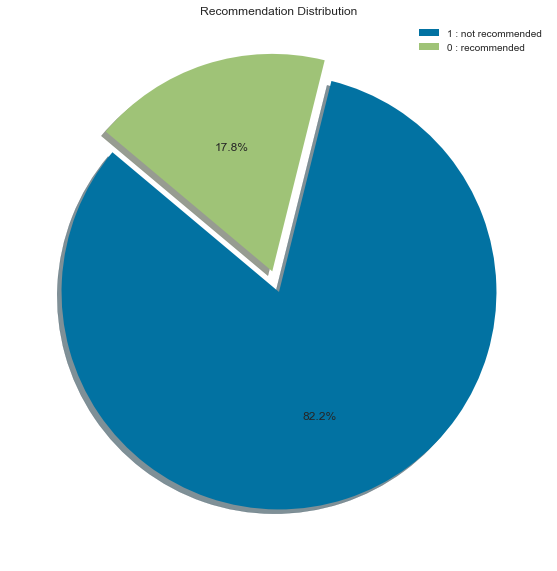

In [195]:
plt.figure(figsize=(10, 10))

explode = [0, 0.1]
plt.pie(df['Recommended IND'].value_counts(), explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1 : not recommended', '0 : recommended'])
plt.title('Recommendation Distribution')
plt.axis('off')
plt.show()

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



In [196]:
df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [197]:
df_ml = df[['Review Text', 'Recommended IND']].copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [198]:
df_ml.isnull().sum()/len(df_ml)*100

Review Text        3.597888
Recommended IND    0.000000
dtype: float64

### Feature Selection and Rename Column Name

In [199]:
df_ml.rename(columns={'Review Text': 'review',
                   'Recommended IND': 'recommend',
                 }, inplace=True)

In [200]:
df_ml.head(2)

,review,recommend
0,Absolutely wonderful - silky and sexy and comfortable,0
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",0


---
---


### Missing Value Detection

In [201]:
df_ml.isnull().sum()

review       845
recommend      0
dtype: int64

In [202]:
print('Percentage of Missing Values:')
df_ml.isnull().sum()/len(df_ml)*100


Percentage of Missing Values:


review       3.597888
recommend    0.000000
dtype: float64

In [203]:
df_ml = df_ml.dropna()

In [204]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     22641 non-null  object
 1   recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [205]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

In [206]:
stop_words = stopwords.words('english')
for i in ["not", "no"]:
    stop_words.remove(i)


In [207]:
def clean(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t)
                    for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)


df_ml["review"] = df_ml["review"].apply(clean)


In [208]:
df_ml.review.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [209]:
df_ml[df_ml['recommend'] == 0]

,review,recommend
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,0
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,0
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,0
6,aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops,0
...,...,...
23479,wasnt sure ordering skirt couldnt see person first im glad skirt design well made doesnt look feel cheap color isnt blaring offensive red worked pale skin better anticipated wore daughter dance production tall boot sweater got numerous compliment fit true picked petite length skirt slight rather tight pencil fit,0
23481,happy snag dress great price easy slip flattering cut color combo,0
23482,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve not maybe others ok,0
23484,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looking,0


In [210]:
df_ml[df_ml['recommend'] == 1]

,review,recommend
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,1
5,love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress,1
10,dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back,1
22,first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure find something exchange,1
25,loved material didnt really look long dress purchased large medium im atleast material foot gap front much wider look felt like dress fell flat returned im usually large med fit better jean,1
...,...,...
23449,tried color really pretty fun donset want pair pant looked awful muscular thigh dont think cut falttering population also not comfortable looked crotch seemed little low though pant correct size,1
23450,wanted love jacket soft great color unfortunately light weight almost like shirt fabric nice heft fabric though nice length accept sleeve short small right size looking something slightly warmer layer,1
23460,purchased good price typically love maeve fabric thin slinky unfortunate way made finding appropriate undergarment difficult add slip helped figured since im losing weight would look better im pound said didnt find figure flattering tummy least one photo bridal shower wore lo,1
23478,surprised positive review product terrible cut weird place make look wide skirt also not like picture darker heavier material isnt great return,1


### Collect Words (positive and negative separately)

In [211]:
positive_words = " ".join(df_ml[df_ml["recommend"] == 0].review).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'msal

In [212]:
negative_words = " ".join(df_ml[df_ml["recommend"] == 1].review).split()
negative_words


['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'not',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'not',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'not',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',


In [213]:
print('Length of Positive Words:', len(positive_words))
print('Length of Negative Words:', len(negative_words))

Length of Positive Words: 531555
Length of Negative Words: 121182


### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [214]:
text = " ".join(df_ml["review"])
text[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

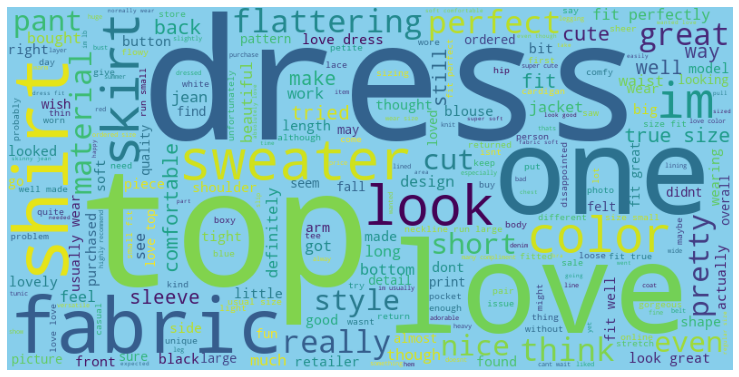

In [215]:
wordcloud = WordCloud(width=800, height=400,
                      background_color="skyblue", max_words=250).generate(text)

plt.figure(figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


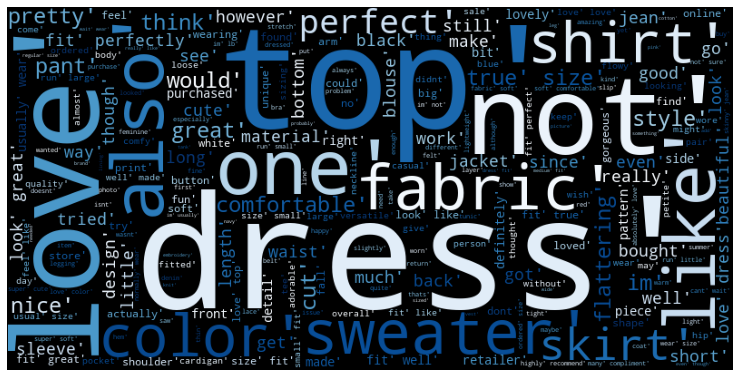

In [216]:
wordcloud = WordCloud(width=800, height=400,
                      colormap='Blues', max_words=250).generate(str(positive_words))

plt.figure(figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


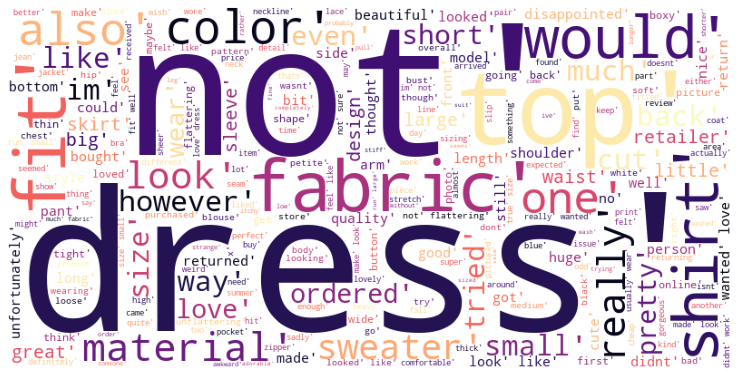

In [217]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='magma', max_words=250).generate(str(negative_words))

plt.figure(figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [218]:
df_ml["review"].values

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looking',
       'dress lovely platinum feminine fit perfectly e

In [219]:
df_ml["recommend"].values

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [220]:
X = df_ml["review"].values
y = df_ml["recommend"].values

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=101)


In [222]:
X_train

array(['love gorgeous shade unflattering skintone make look sallow version tied dress holding horse come fantastic fit flattering tummy rib cage size generous curve give regular',
       'found store last weekend thought perfect got size small plenty space usually small long found knee length zoom see detail work along front edge complement pretty openwork back pocket btw worn everything summer let hope blend wash ok',
       'negative thing say color person different much coral pink rosy pink fine tad unexpected ordered size fit perfectly chest laser cut out yoke add nice feminine unique touch otherwise basic top cant wait wear',
       ...,
       'wanted love skirt good quality front loose flap exposing return',
       'absolutely love top soft comfortable perfectly flowy definitely favorite go casual summer top',
       'purchased blue version store nice royal blue not navy although could worn navy thought fit flattering middle piece pleat le obvious blue purple tie neck untied sti

In [223]:
X_train[8]


'loved top great design comfortable unique soft material'

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [224]:
from sklearn.feature_extraction.text import CountVectorizer

In [225]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)


In [226]:
vectorizer.get_feature_names_out()


array(['aa', 'aaaaaaamazing', 'aaaaandidontwanttopayforshipping', ...,
       'zoom', 'zooming', 'zuma'], dtype=object)

In [227]:
X_train_count


<18112x10958 sparse matrix of type '<class 'numpy.int64'>'
	with 472835 stored elements in Compressed Sparse Row format>

In [228]:
X_train_count.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [229]:
df_train_count = pd.DataFrame(
    X_train_count.toarray(), columns=vectorizer.get_feature_names_out())
df_train_count

,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,...,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
df_test_count = pd.DataFrame(X_test_count.toarray(), columns=vectorizer.get_feature_names_out())
df_test_count


,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,...,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [231]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [232]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)


In [233]:
tf_idf_vectorizer.get_feature_names_out()


array(['aa', 'aaaaaaamazing', 'aaaaandidontwanttopayforshipping', ...,
       'zoom', 'zooming', 'zuma'], dtype=object)

In [234]:
X_train_tf_idf.toarray()


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.2782616, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [235]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns=tf_idf_vectorizer.get_feature_names_out())
df_train_tfidf


,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,...,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278262,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [236]:
df_train_tfidf.loc[1].sort_values(ascending=False)


openwork    0.312181
zoom        0.278262
found       0.261329
btw         0.249971
space       0.230701
              ...   
flood       0.000000
floofs      0.000000
floor       0.000000
floored     0.000000
zuma        0.000000
Name: 1, Length: 10958, dtype: float64

In [237]:
df_test_tfidf = pd.DataFrame(X_test_tf_idf.toarray(), columns=tf_idf_vectorizer.get_feature_names_out())
df_test_tfidf


,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,...,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.146133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [238]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score


In [239]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")


### CountVectorizer

In [240]:
from sklearn.linear_model import LogisticRegression

log_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
log_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG COUNT MODEL:
-------------------------------
[[3210  499]
 [ 125  695]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3709
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     14831
           1       0.66      0.93      0.77      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.91     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


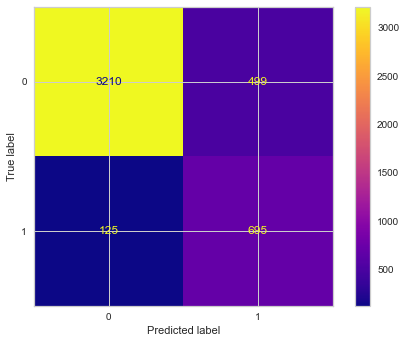

In [241]:
print("LOG COUNT MODEL:")
print('-------------------------------')
eval(log_count, X_train_count, X_test_count)


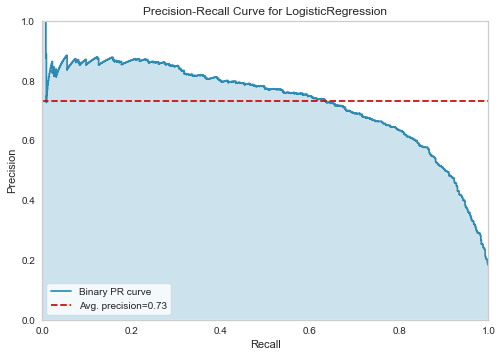

In [242]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000,
                       class_weight="balanced", random_state=101),
    classes=log_count.classes_,
    per_class=False,
    cmap="Set1")
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();


In [243]:
y_pred = log_count.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
log_count_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
log_AP = viz.score_


In [244]:
print("viz.score_       : ", viz.score_)
print("LogReg_Count_rec : ", log_count_rec)
print("LogReg_Count_f1  : ", log_count_f1)
print("LogReg_Count_AP  : ", log_AP)


viz.score_       :  0.7301994787183865
LogReg_Count_rec :  [0.86546239 0.84756098]
LogReg_Count_f1  :  [0.91141397 0.69016882]
LogReg_Count_AP  :  0.7301994787183865


In [245]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scoring = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in scoring.items():
    model = LogisticRegression(
        C=0.1, max_iter=1000, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count,
                             y_train, cv=10, scoring=j).mean()
    if i == "recall-0":
        log_count_rec = scores
    elif i == "f1-0":
        log_count_f1 = scores
    print(f" {i:20} score for LogReg_Count : {scores}\n")


 accuracy             score for LogReg_Count : 0.864620610129659

 precision-0          score for LogReg_Count : 0.9585268047856081

 recall-0             score for LogReg_Count : 0.8724294929233924

 f1-0                 score for LogReg_Count : 0.9134406694827385

 precision-1          score for LogReg_Count : 0.5900382235964614

 recall-1             score for LogReg_Count : 0.8293285269478835

 f1-1                 score for LogReg_Count : 0.6894274486541935



### TF-IDF

In [246]:
log_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
log_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

Log_Regression TFIDF Model:
------------------------------
[[3195  514]
 [ 115  705]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.93      0.77      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


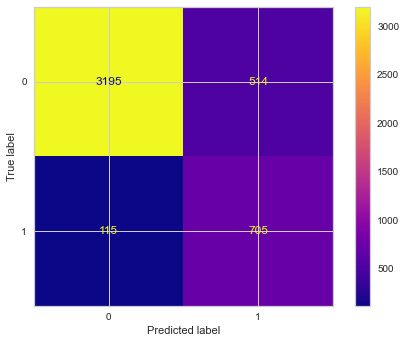

In [247]:
print("Log_Regression TFIDF Model:")
print("------------------------------")
eval(log_tfidf, X_train_tf_idf, X_test_tf_idf)


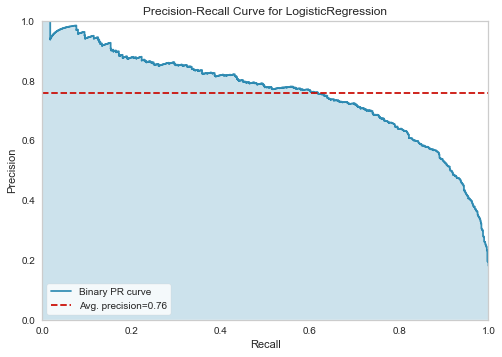

In [248]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C=1, max_iter=1000,
                       class_weight="balanced", random_state=101),
    classes=log_tfidf.classes_,
    per_class=False,
    cmap="Set1")


viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();


In [249]:
y_pred = log_tfidf.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
log_tf_idf_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
log_tf_idf_AP = viz.score_


In [250]:
print("viz.score_       : ", viz.score_)
print("Log_TFIDF_rec : ", log_tf_idf_rec)
print("Log_TFIDF_f1  : ", log_tf_idf_f1)
print("Log_TFIDF_AP  : ", log_tf_idf_AP)


viz.score_       :  0.7587966441351272
Log_TFIDF_rec :  [0.86141817 0.8597561 ]
Log_TFIDF_f1  :  [0.91038609 0.69151545]
Log_TFIDF_AP  :  0.7587966441351272


In [251]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision-neg': make_scorer(precision_score, pos_label=1),
           'recall-neg': make_scorer(recall_score, pos_label=1),
           'f1-neg': make_scorer(f1_score, pos_label=1)}

model = LogisticRegression(
    C=1, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.867271
train_accuracy         0.898011
test_precision-neg     0.593636
train_precision-neg    0.651981
test_recall-neg        0.850052
train_recall-neg       0.937350
test_f1-neg            0.698934
train_f1-neg           0.769045
dtype: float64

## Naive Bayes 

### Countvectorizer

In [252]:
from sklearn.naive_bayes import MultinomialNB


In [253]:
nb = MultinomialNB()  # alpha default 1
nb.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
[[3463  246]
 [ 249  571]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3709
           1       0.70      0.70      0.70       820

    accuracy                           0.89      4529
   macro avg       0.82      0.82      0.82      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     14831
           1       0.75      0.78      0.77      3281

    accuracy                           0.91     18112
   macro avg       0.85      0.86      0.86     18112
weighted avg       0.91      0.91      0.91     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


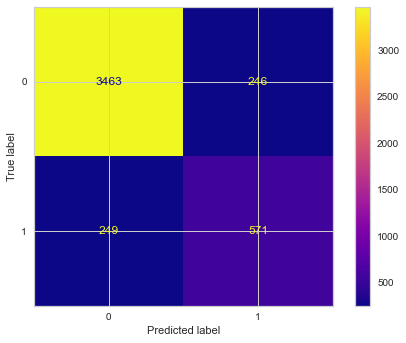

In [254]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)


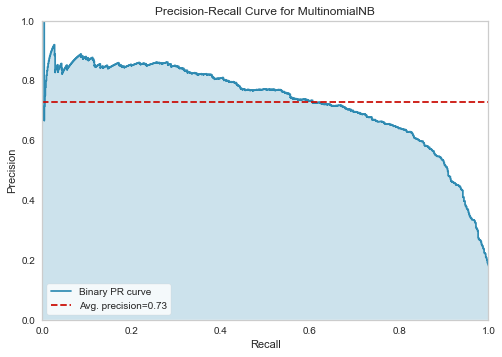

<AxesSubplot:title={'center':'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [255]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=False,
    cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()


In [256]:
y_pred = nb.predict(X_test_count)
nb_multi_count_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
nb_multi_count_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
nb_multi_count_AP = viz.score_


In [257]:
print("viz.score_         : ", viz.score_)
print("NBMulti_Count_rec : ", nb_multi_count_rec)
print("NBMulti_Count_f1  : ", nb_multi_count_f1)
print("NBMulti_Count_AP  : ", nb_multi_count_AP)


viz.score_         :  0.728930823053222
NBMulti_Count_rec :  [0.93367484 0.69634146]
NBMulti_Count_f1  :  [0.9332974  0.69761759]
NBMulti_Count_AP  :  0.728930823053222


In [258]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision-neg': make_scorer(precision_score, pos_label=1),
           'recall-neg': make_scorer(recall_score, pos_label=1),
           'f1-neg': make_scorer(f1_score, pos_label=1)}

model = MultinomialNB()
scores = cross_validate(model, X_train_count, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.883724
train_accuracy         0.915194
test_precision-neg     0.674089
train_precision-neg    0.759486
test_recall-neg        0.693690
train_recall-neg       0.778353
test_f1-neg            0.683610
train_f1-neg           0.768800
dtype: float64

With Bernoulli

In [259]:
from sklearn.naive_bayes import BernoulliNB

In [260]:
nbberno = BernoulliNB()
nbberno.fit(X_train_count,y_train)

BernoulliNB()

NB MODEL WITH BERNOULLI
[[3473  236]
 [ 315  505]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3709
           1       0.68      0.62      0.65       820

    accuracy                           0.88      4529
   macro avg       0.80      0.78      0.79      4529
weighted avg       0.87      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14831
           1       0.73      0.73      0.73      3281

    accuracy                           0.90     18112
   macro avg       0.84      0.83      0.83     18112
weighted avg       0.90      0.90      0.90     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


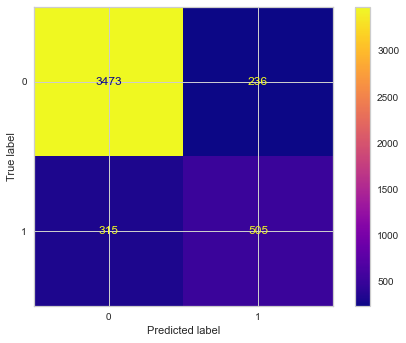

In [261]:
print("NB MODEL WITH BERNOULLI")
eval(nbberno, X_train_count, X_test_count)


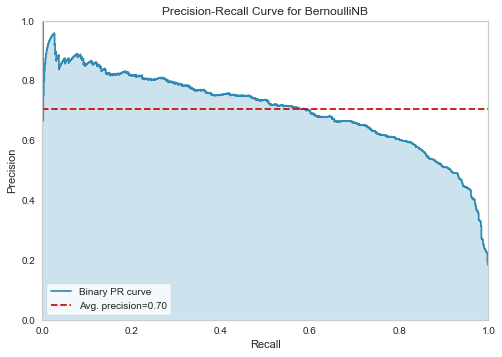

<AxesSubplot:title={'center':'Precision-Recall Curve for BernoulliNB'}, xlabel='Recall', ylabel='Precision'>

In [262]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nbberno.classes_,
    per_class=False,
    cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()


In [263]:
y_pred = nbberno.predict(X_test_count)
nbberno_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
nbberno_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
nbberno_AP = viz.score_


In [133]:
print("viz.score_         : ", viz.score_)
print("NBMulti_Count_rec : ", nbberno_rec)
print("NBMulti_Count_f1  : ", nbberno_f1)
print("NBMulti_Count_AP  : ", nbberno_AP)


viz.score_         :  0.7039948363300307
NBMulti_Count_rec :  [0.93637099 0.61585366]
NBMulti_Count_f1  :  [0.92650393 0.64702114]
NBMulti_Count_AP  :  0.7039948363300307


In [134]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision-neg': make_scorer(precision_score, pos_label=1),
           'recall-neg': make_scorer(recall_score, pos_label=1),
           'f1-neg': make_scorer(f1_score, pos_label=1)}

model = BernoulliNB()
scores = cross_validate(model, X_train_count, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.872847
train_accuracy         0.902815
test_precision-neg     0.655150
train_precision-neg    0.742038
test_recall-neg        0.630603
train_recall-neg       0.710556
test_f1-neg            0.642443
train_f1-neg           0.725949
dtype: float64

### TF-IDF

With Multinomial:

In [135]:
nbmulti_tfidf = MultinomialNB()
nbmulti_tfidf.fit(X_train_tf_idf,y_train)

MultinomialNB()

NBMulti_TFIDF MODEL:
--------------------------
[[3707    2]
 [ 793   27]]
Test_Set
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3709
           1       0.93      0.03      0.06       820

    accuracy                           0.82      4529
   macro avg       0.88      0.52      0.48      4529
weighted avg       0.84      0.82      0.75      4529

Train_Set
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     14831
           1       0.97      0.10      0.18      3281

    accuracy                           0.84     18112
   macro avg       0.90      0.55      0.55     18112
weighted avg       0.86      0.84      0.78     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


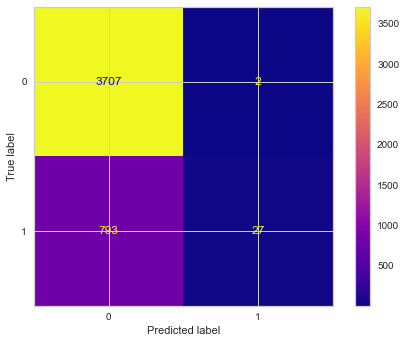

In [136]:
print("NBMulti_TFIDF MODEL:")
eval(nbmulti_tfidf, X_train_tf_idf, X_test_tf_idf)


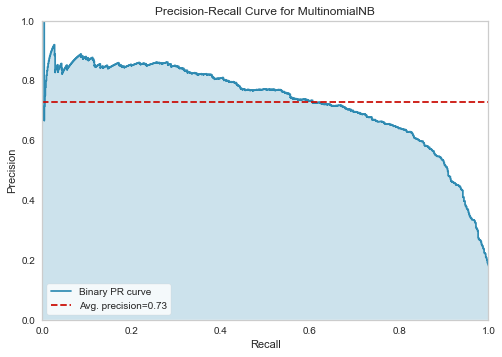

<AxesSubplot:title={'center':'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [138]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nbmulti_tfidf.classes_,
    per_class=False,
    cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()


In [140]:
y_pred = nbmulti_tfidf.predict(X_test_tf_idf)
nb_multi_tf_idf_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
nb_multi_tf_idf_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
nb_multi_tf_idf_AP = viz.score_


In [141]:
print("viz.score_        : ", viz.score_)
print("NBMulti_TFIDF_rec : ", nb_multi_tf_idf_rec)
print("NBMulti_TFIDF_f1  : ", nb_multi_tf_idf_f1)
print("NBMulti_TFIDF_AP  : ", nb_multi_tf_idf_AP)


viz.score_        :  0.728930823053222
NBMulti_TFIDF_rec :  [0.99946077 0.03292683]
NBMulti_TFIDF_f1  :  [0.90315507 0.06360424]
NBMulti_TFIDF_AP  :  0.728930823053222


In [142]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision-neg': make_scorer(precision_score, pos_label=1),
           'recall-neg': make_scorer(recall_score, pos_label=1),
           'f1-neg': make_scorer(f1_score, pos_label=1)}

model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.827131
train_accuracy         0.834033
test_precision-neg     0.915352
train_precision-neg    0.978726
test_recall-neg        0.050597
train_recall-neg       0.085679
test_f1-neg            0.095621
train_f1-neg           0.157558
dtype: float64

With Bernoulli:

In [264]:
nbberno_tfidf = BernoulliNB()
nbberno_tfidf.fit(X_train_tf_idf,y_train)

BernoulliNB()

NBBerno TFIDF Model:
[[3473  236]
 [ 315  505]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3709
           1       0.68      0.62      0.65       820

    accuracy                           0.88      4529
   macro avg       0.80      0.78      0.79      4529
weighted avg       0.87      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14831
           1       0.73      0.73      0.73      3281

    accuracy                           0.90     18112
   macro avg       0.84      0.83      0.83     18112
weighted avg       0.90      0.90      0.90     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


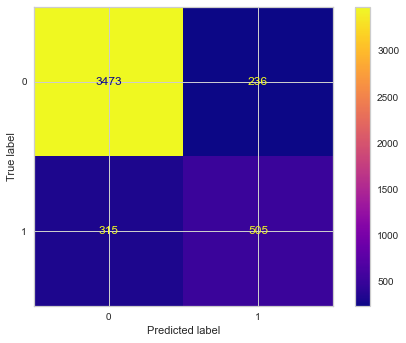

In [265]:
print("NBBerno TFIDF Model:")
eval(nbberno_tfidf, X_train_tf_idf, X_test_tf_idf)


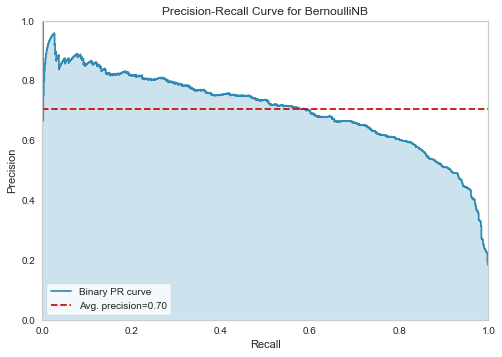

<AxesSubplot:title={'center':'Precision-Recall Curve for BernoulliNB'}, xlabel='Recall', ylabel='Precision'>

In [266]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nbberno_tfidf.classes_,
    per_class=False,
    cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()


In [267]:
y_pred = nbberno_tfidf.predict(X_test_tf_idf)
nb_berno_tf_idf_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
nb_berno_tf_idf_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
nb_berno_tf_idf_AP = viz.score_


In [268]:
print("viz.score_        : ", viz.score_)
print("NBBerno_TFIDF_rec : ", nb_berno_tf_idf_rec)
print("NBBerno_TFIDF_f1  : ", nb_berno_tf_idf_f1)
print("NBBerno_TFIDF_AP  : ", nb_berno_tf_idf_AP)


viz.score_        :  0.7039948363300307
NBBerno_TFIDF_rec :  [0.93637099 0.61585366]
NBBerno_TFIDF_f1  :  [0.92650393 0.64702114]
NBBerno_TFIDF_AP  :  0.7039948363300307


In [269]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision-neg': make_scorer(precision_score, pos_label=1),
           'recall-neg': make_scorer(recall_score, pos_label=1),
           'f1-neg': make_scorer(f1_score, pos_label=1)}

model = BernoulliNB()
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.872847
train_accuracy         0.902815
test_precision-neg     0.655150
train_precision-neg    0.742038
test_recall-neg        0.630603
train_recall-neg       0.710556
test_f1-neg            0.642443
train_f1-neg           0.725949
dtype: float64

## Support Vector Machine (SVM)

### Countvectorizer

In [270]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC Count Model:
[[3211  498]
 [ 123  697]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3709
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     14831
           1       0.66      0.93      0.77      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.93      0.90      0.91     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


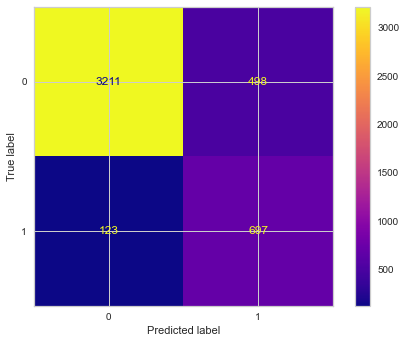

In [271]:
print("SVC Count Model:")
eval(svc, X_train_count, X_test_count)


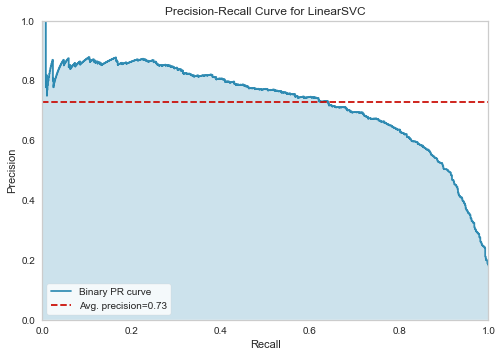

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [272]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=False,
    cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()


In [274]:
y_pred = svc.predict(X_test_count)
svc_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
svc_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
svc_AP = viz.score_


In [275]:
print("viz.score_    : ", viz.score_)
print("SVC_rec : ", svc_rec)
print("SVC_f1  : ", svc_f1)
print("SVC_AP  : ", svc_AP)


viz.score_    :  0.7282248424107528
SVC_rec :  [0.865732 0.85    ]
SVC_f1  :  [0.91182735 0.69181141]
SVC_AP  :  0.7282248424107528


In [276]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.863516
train_accuracy         0.901575
test_precision-neg     0.587399
train_precision-neg    0.661321
test_recall-neg        0.829936
train_recall-neg       0.936063
test_f1-neg            0.687831
train_f1-neg           0.775063
dtype: float64

### TD-IDF

In [279]:
from sklearn.svm import LinearSVC
svc_tfidf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_tfidf.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC TFIDF Model:
[[3113  596]
 [ 110  710]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.54      0.87      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.85      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.56      0.90      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


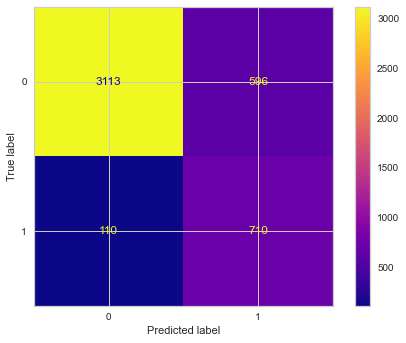

In [280]:
print("SVC TFIDF Model:")
eval(svc_tfidf, X_train_tf_idf, X_test_tf_idf)


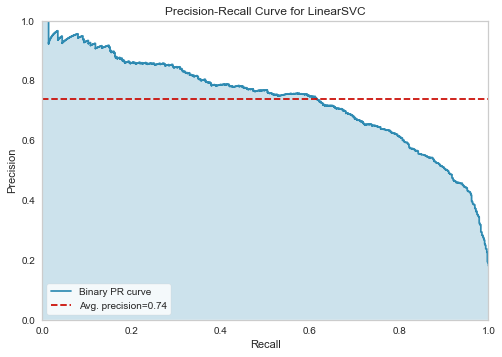

In [281]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc_tfidf.classes_,
    per_class=False,
    cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [282]:
y_pred = svc_tfidf.predict(X_test_tf_idf)
svc_tfidf_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
svc_tfidf_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
svc_tfidf_AP = viz.score_


In [283]:
print("viz.score_    : ", viz.score_)
print("SVC_tfidf_rec : ", svc_tfidf_rec)
print("SVC_tfidf_f1  : ", svc_tfidf_f1)
print("SVC_tfidf_AP  : ", svc_tfidf_AP)


viz.score_    :  0.7373082215265989
SVC_tfidf_rec :  [0.83930979 0.86585366]
SVC_tfidf_f1  :  [0.89815349 0.66792098]
SVC_tfidf_AP  :  0.7373082215265989


In [284]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.843805
train_accuracy         0.855387
test_precision-neg     0.543394
train_precision-neg    0.563093
test_recall-neg        0.865894
train_recall-neg       0.900132
test_f1-neg            0.667631
train_f1-neg           0.692794
dtype: float64

## Random Forest

### Countvectorizer

In [312]:
from sklearn.ensemble import RandomForestClassifier
# class_weight="balanced"
rf = RandomForestClassifier(
    100, max_depth=40, random_state=101, class_weight="balanced")
rf.fit(X_train_count, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=40, random_state=101)

RF MODEL
[[3527  182]
 [ 362  458]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3709
           1       0.72      0.56      0.63       820

    accuracy                           0.88      4529
   macro avg       0.81      0.75      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14831
           1       0.94      0.97      0.96      3281

    accuracy                           0.98     18112
   macro avg       0.97      0.98      0.97     18112
weighted avg       0.98      0.98      0.98     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


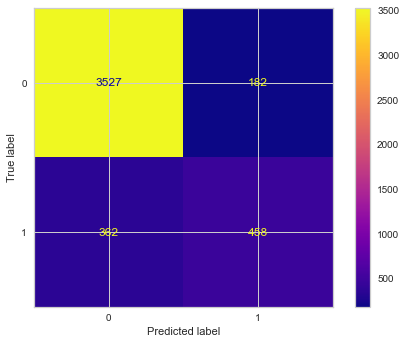

In [313]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)


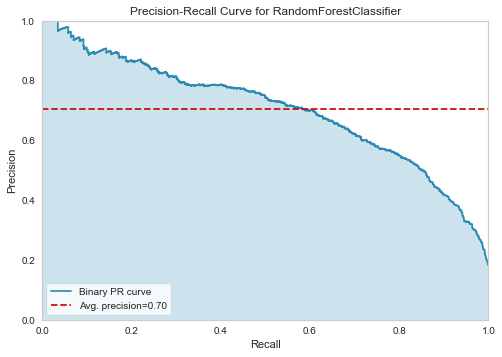

In [314]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(
        100, max_depth=40, random_state=101, class_weight="balanced"),
    classes=rf.classes_,
    per_class=False,
    cmap="Set1"
)
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();


In [315]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(
    y_test, y_pred, pos_label=1, average=None)
rf_count_f1_neg = f1_score(y_test, y_pred, pos_label=1, average=None)
rf_AP_neg = viz.score_


In [316]:
print("viz.score_   : ", viz.score_)
print("RF_Count_rec : ", rf_count_rec_neg)
print("RF_Count_f1  : ", rf_count_f1_neg)
print("RF_Count_AP  : ", rf_AP_neg)


viz.score_   :  0.7047688324734204
RF_Count_rec :  [0.95093017 0.55853659]
RF_Count_f1  :  [0.92840221 0.62739726]
RF_Count_AP  :  0.7047688324734204


In [317]:
model = RandomForestClassifier(100, max_depth=40, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.875332
train_accuracy         0.983614
test_precision-neg     0.717390
train_precision-neg    0.938320
test_recall-neg        0.515708
train_recall-neg       0.973585
test_f1-neg            0.599611
train_f1-neg           0.955616
dtype: float64

### TF-IDF

In [318]:
rf_tf_idf = RandomForestClassifier(100, max_depth=40, random_state=101, class_weight="balanced")
rf_tf_idf.fit(X_train_tf_idf, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=40, random_state=101)

RF_TFIDF Model
[[3538  171]
 [ 366  454]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3709
           1       0.73      0.55      0.63       820

    accuracy                           0.88      4529
   macro avg       0.82      0.75      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14831
           1       0.96      0.98      0.97      3281

    accuracy                           0.99     18112
   macro avg       0.98      0.99      0.98     18112
weighted avg       0.99      0.99      0.99     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


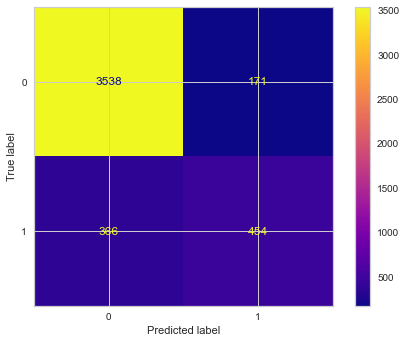

In [319]:
print("RF_TFIDF Model")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)


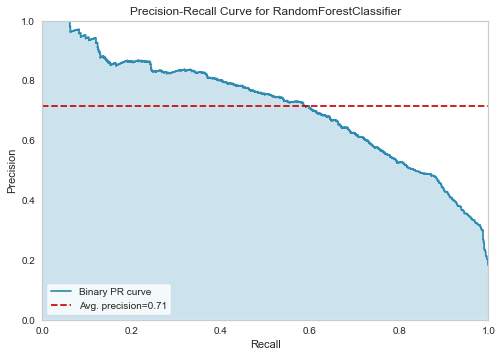

In [320]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(
        100, max_depth=40, random_state=101, class_weight="balanced"),
    classes=rf_tf_idf.classes_,
    per_class=False,
    cmap="Set1")


viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();


In [322]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
rf_tf_idf_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
rf_tf_idf_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
rf_tf_idf_AP = viz.score_


In [323]:
print("viz.score_   : ", viz.score_)
print("RF_TFIDF_rec : ", rf_tf_idf_rec)
print("RF_TFIDF_f1  : ", rf_tf_idf_f1)
print("RF_TFIDF_AP  : ", rf_tf_idf_AP)


viz.score_   :  0.713647095202792
RF_TFIDF_rec :  [0.95389593 0.55365854]
RF_TFIDF_f1  :  [0.92946276 0.6283737 ]
RF_TFIDF_AP  :  0.713647095202792


In [324]:
model = RandomForestClassifier(
    100, max_depth=40, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.874283
train_accuracy         0.989185
test_precision-neg     0.711862
train_precision-neg    0.957593
test_recall-neg        0.514178
train_recall-neg       0.983914
test_f1-neg            0.596731
train_f1-neg           0.970561
dtype: float64

## Ada Boosting

### Countvectorizer

In [325]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=500, random_state=101)
ada.fit(X_train_count, y_train)


AdaBoostClassifier(n_estimators=500, random_state=101)

Ada MODEL
[[3489  220]
 [ 351  469]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3709
           1       0.68      0.57      0.62       820

    accuracy                           0.87      4529
   macro avg       0.79      0.76      0.77      4529
weighted avg       0.87      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14831
           1       0.80      0.66      0.72      3281

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.84     18112
weighted avg       0.90      0.91      0.91     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


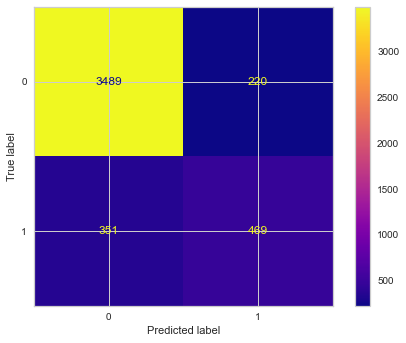

In [326]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)


In [327]:
model = AdaBoostClassifier(n_estimators=500, random_state=101)
scores = cross_validate(model, X_train_count, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.879417
train_accuracy         0.910777
test_precision-neg     0.702316
train_precision-neg    0.807646
test_recall-neg        0.582145
train_recall-neg       0.666125
test_f1-neg            0.636195
train_f1-neg           0.730083
dtype: float64

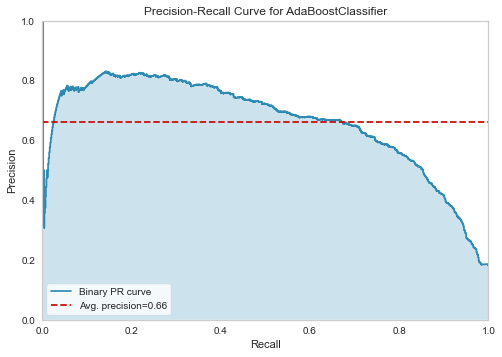

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [328]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators=500, random_state=101),
    classes=ada.classes_,
    per_class=False,
    cmap="Set1"
)
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [329]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(
    y_test, y_pred, pos_label=1, average=None)
ada_count_f1_neg = f1_score(y_test, y_pred, pos_label=1, average=None)
ada_AP_neg = viz.score_


In [330]:
print("viz.score_    : ", viz.score_)
print("Ada_Count_rec : ", ada_count_rec_neg)
print("Ada_Count_f1  : ", ada_count_f1_neg)
print("Ada_Count_AP  : ", ada_AP_neg)


viz.score_    :  0.6617740410093149
Ada_Count_rec :  [0.94068482 0.57195122]
Ada_Count_f1  :  [0.92436084 0.62160371]
Ada_Count_AP  :  0.6617740410093149


### TF-IDF

In [331]:
ada_tf_idf = AdaBoostClassifier(n_estimators=500, random_state=101)
ada_tf_idf.fit(X_train_tf_idf, y_train)


AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_TFIDF Model
[[3464  245]
 [ 351  469]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3709
           1       0.66      0.57      0.61       820

    accuracy                           0.87      4529
   macro avg       0.78      0.75      0.77      4529
weighted avg       0.86      0.87      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14831
           1       0.83      0.72      0.77      3281

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



c:\Users\Pakize\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


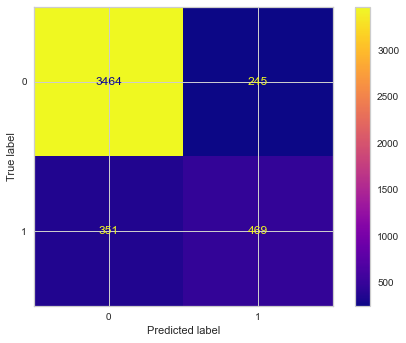

In [332]:
print("Ada_TFIDF Model")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)


In [333]:
model = AdaBoostClassifier(n_estimators=500, random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.872792
train_accuracy         0.924967
test_precision-neg     0.680206
train_precision-neg    0.839073
test_recall-neg        0.563243
train_recall-neg       0.724813
test_f1-neg            0.615845
train_f1-neg           0.777764
dtype: float64

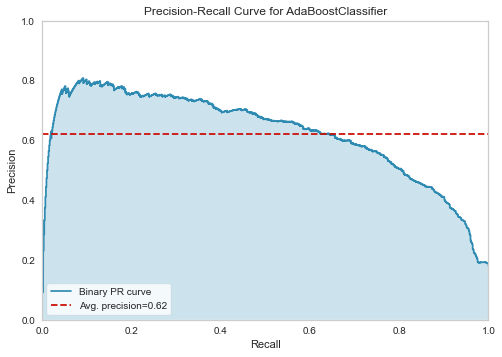

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [334]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators=500, random_state=101),
    classes=ada_tf_idf.classes_,
    per_class=False,
    cmap="Set1"
)
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();


In [336]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(
    y_test, y_pred, pos_label=1, average=None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, pos_label=1, average=None)
ada_tfidf_AP_neg = viz.score_


In [337]:
print("viz.score_    : ", viz.score_)
print("Ada_TFIDF_rec : ", ada_tfidf_rec_neg)
print("Ada_TFIDF_f1  : ", ada_tfidf_f1_neg)
print("Ada_TFIDF_AP  : ", ada_tfidf_AP_neg)


viz.score_    :  0.6231063079028203
Ada_TFIDF_rec :  [0.93394446 0.57195122]
Ada_TFIDF_f1  :  [0.92078682 0.61147327]
Ada_TFIDF_AP  :  0.6231063079028203


## DL modeling

### Tokenization

### Creating word index

### Converting tokens to numeric

### Maximum number of tokens for all documents¶

### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

## BERT Modeling

### Tokenization

### Transformation text to tensor

### Train test split

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___